In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import streamlit as st

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
columns_to_drop = ['restecg', 'oldpeak', 'slope', 'ca','thal']

In [6]:
df = df.drop(columns_to_drop, axis=1)

In [70]:
df.shape

(1025, 9)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'target'],
      dtype='object')

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,149.114146,0.336585,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,23.005724,0.472772,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,152.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,202.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
target      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1025 non-null   int64
 1   sex       1025 non-null   int64
 2   cp        1025 non-null   int64
 3   trestbps  1025 non-null   int64
 4   chol      1025 non-null   int64
 5   fbs       1025 non-null   int64
 6   thalach   1025 non-null   int64
 7   exang     1025 non-null   int64
 8   target    1025 non-null   int64
dtypes: int64(9)
memory usage: 72.2 KB


<AxesSubplot:>

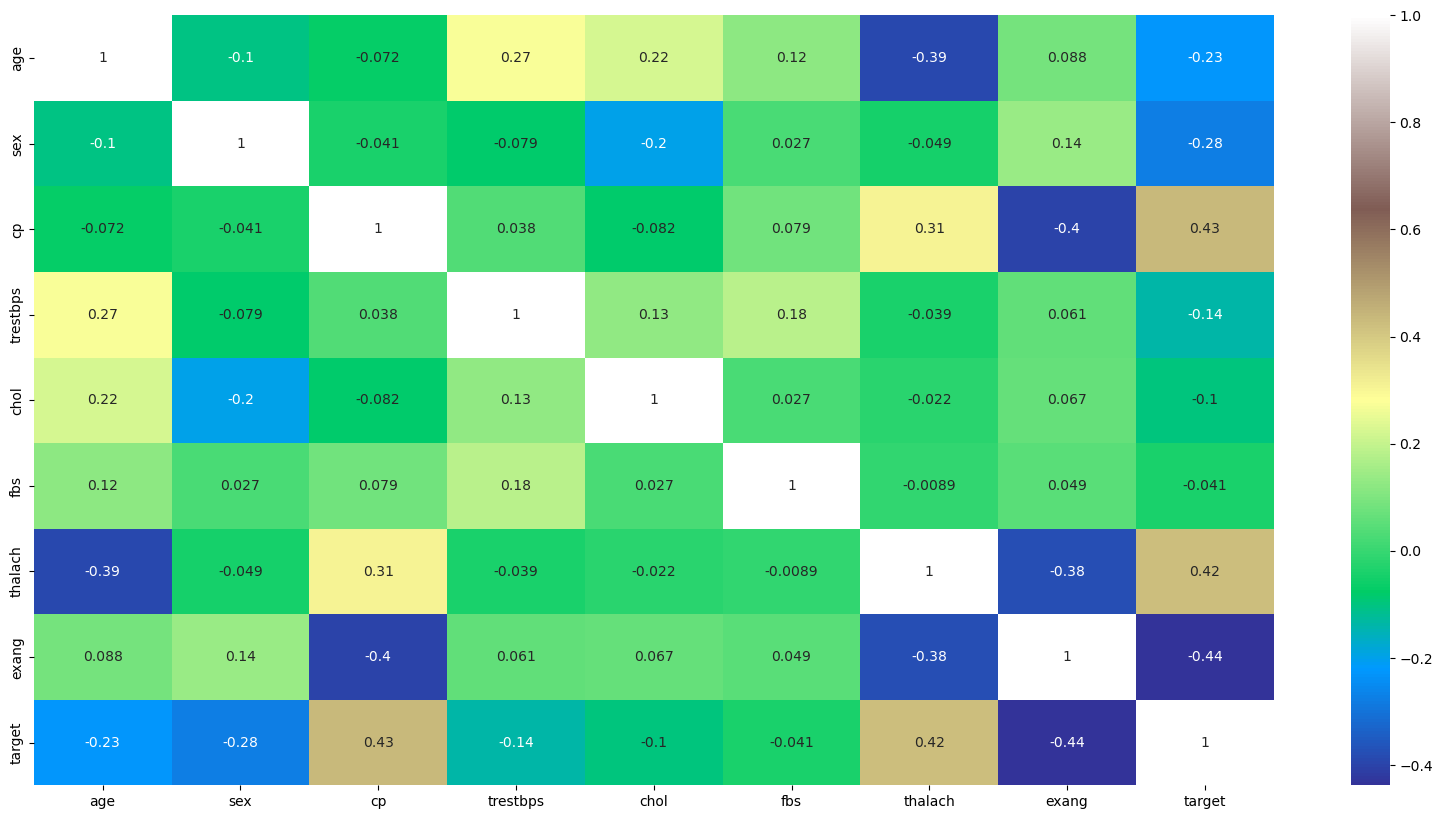

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap = 'terrain' )

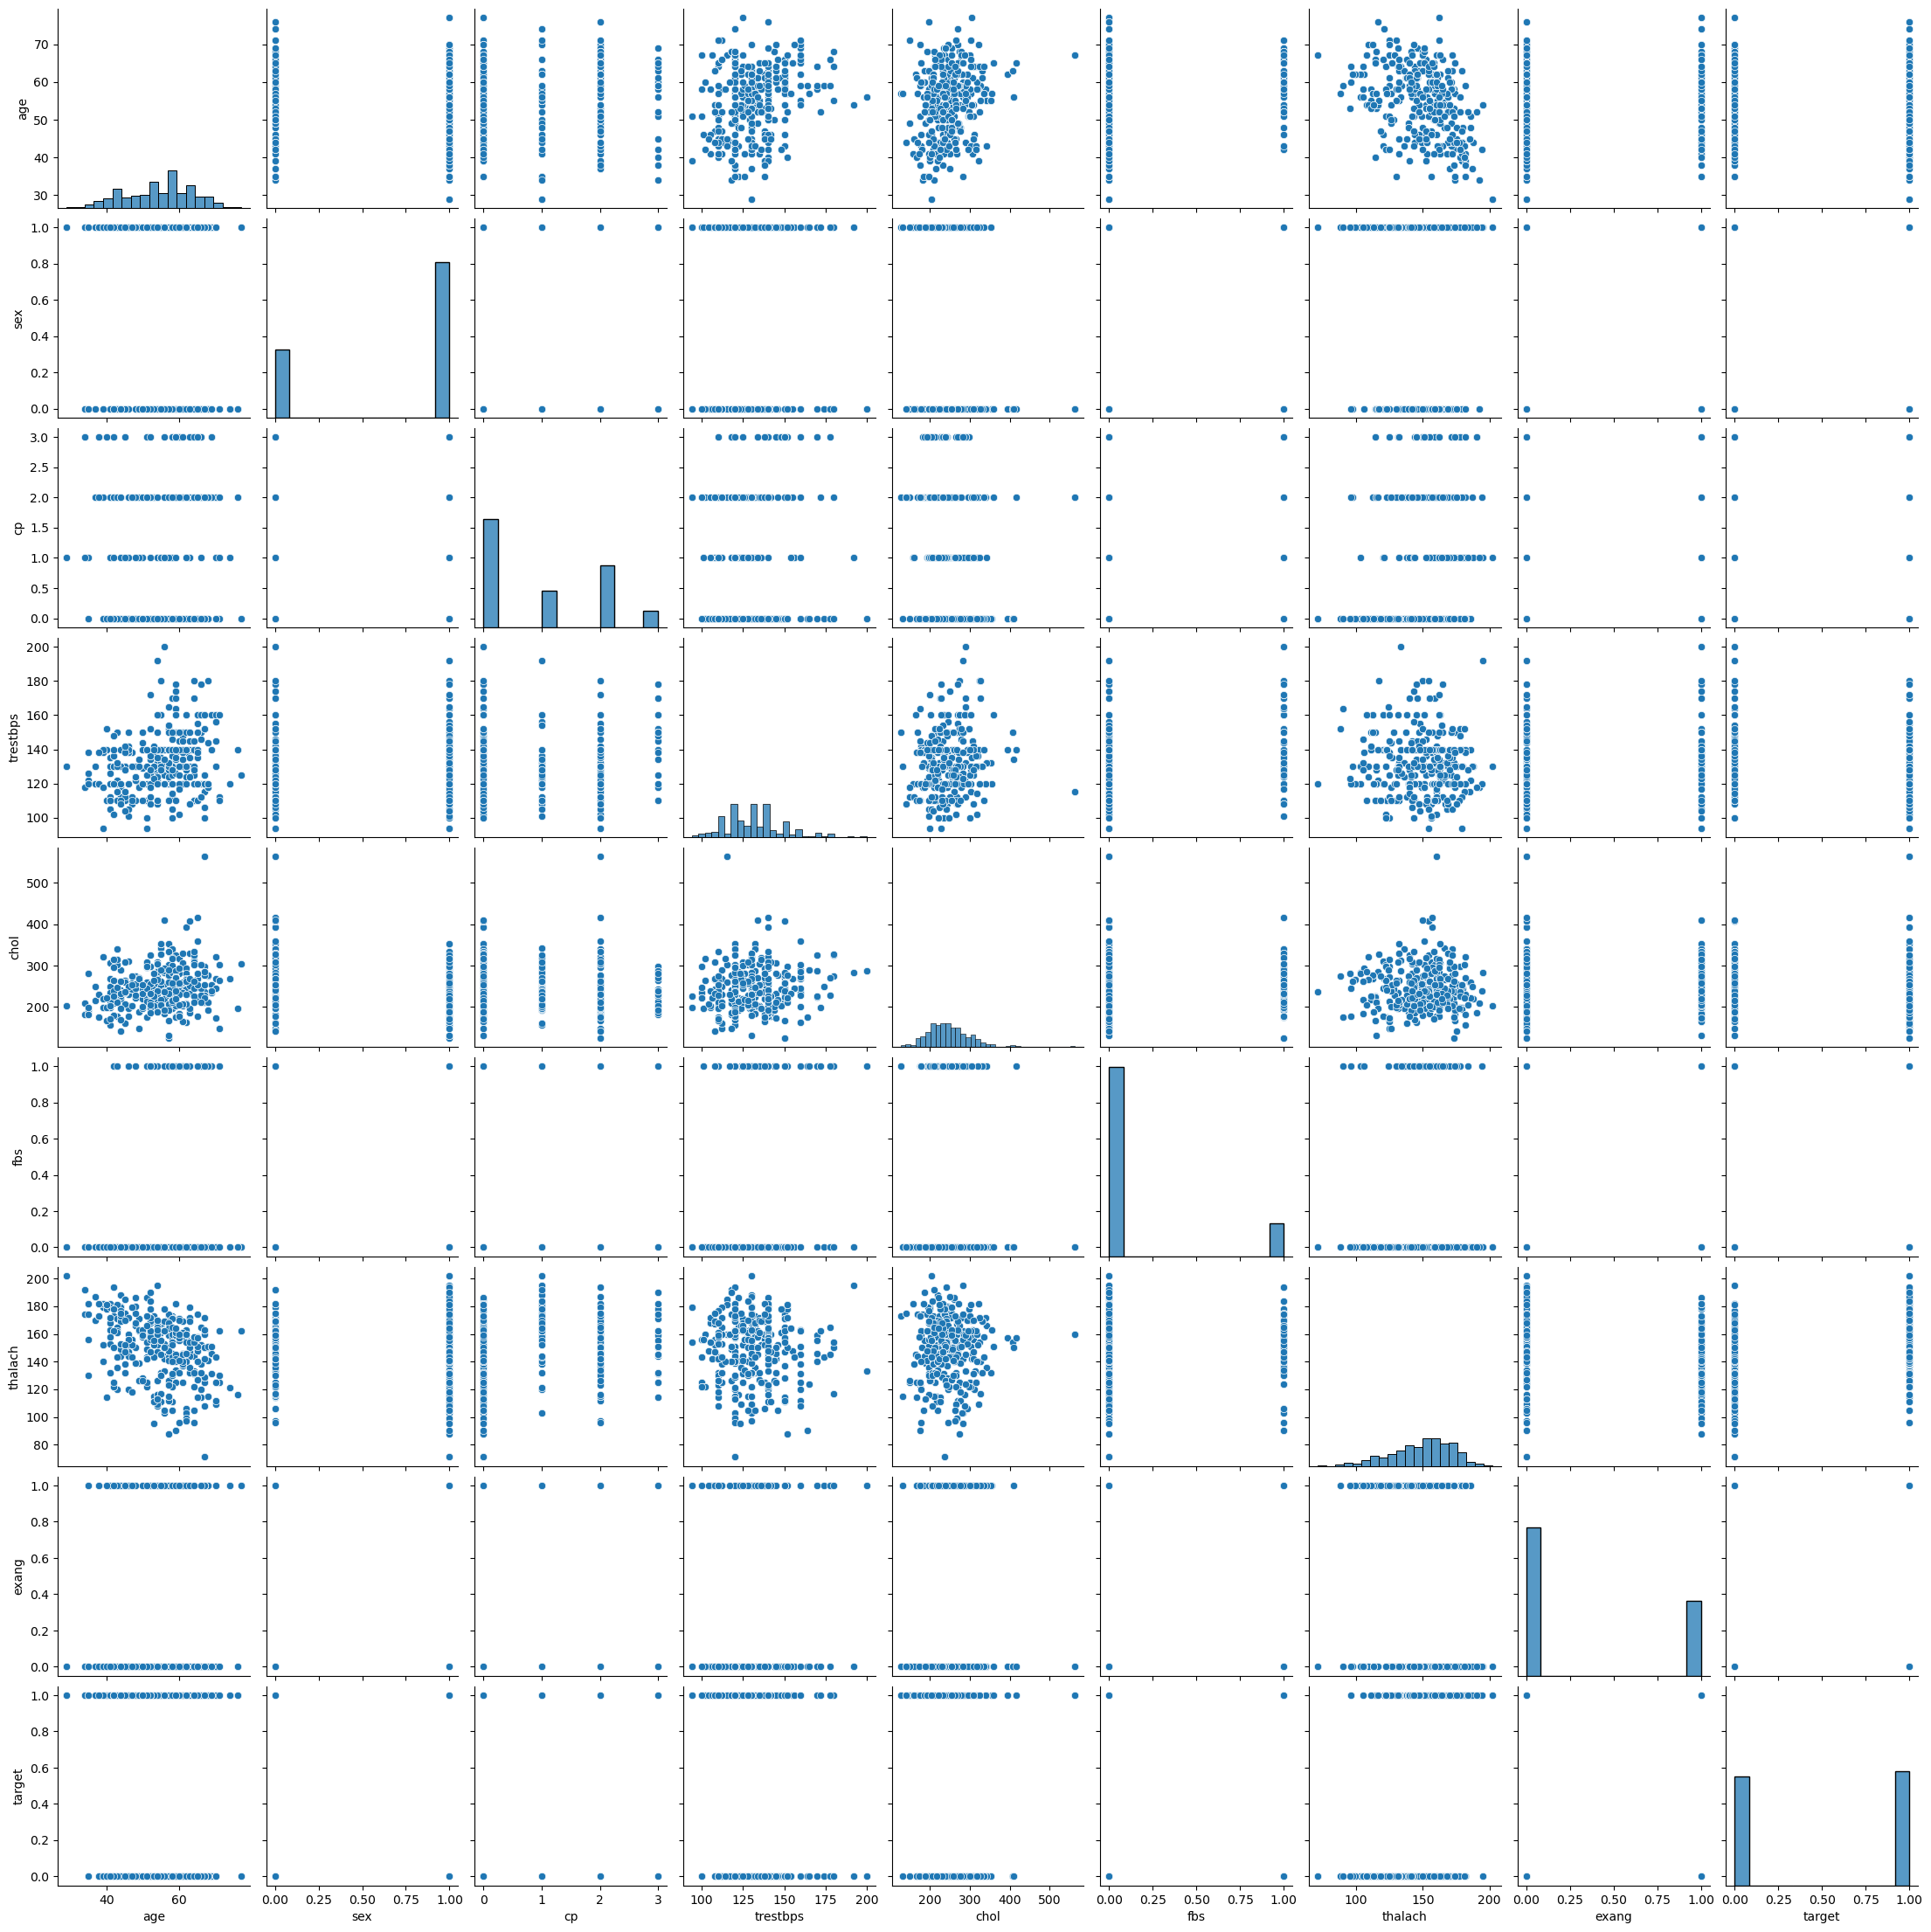

In [13]:
sns.pairplot(data=df)

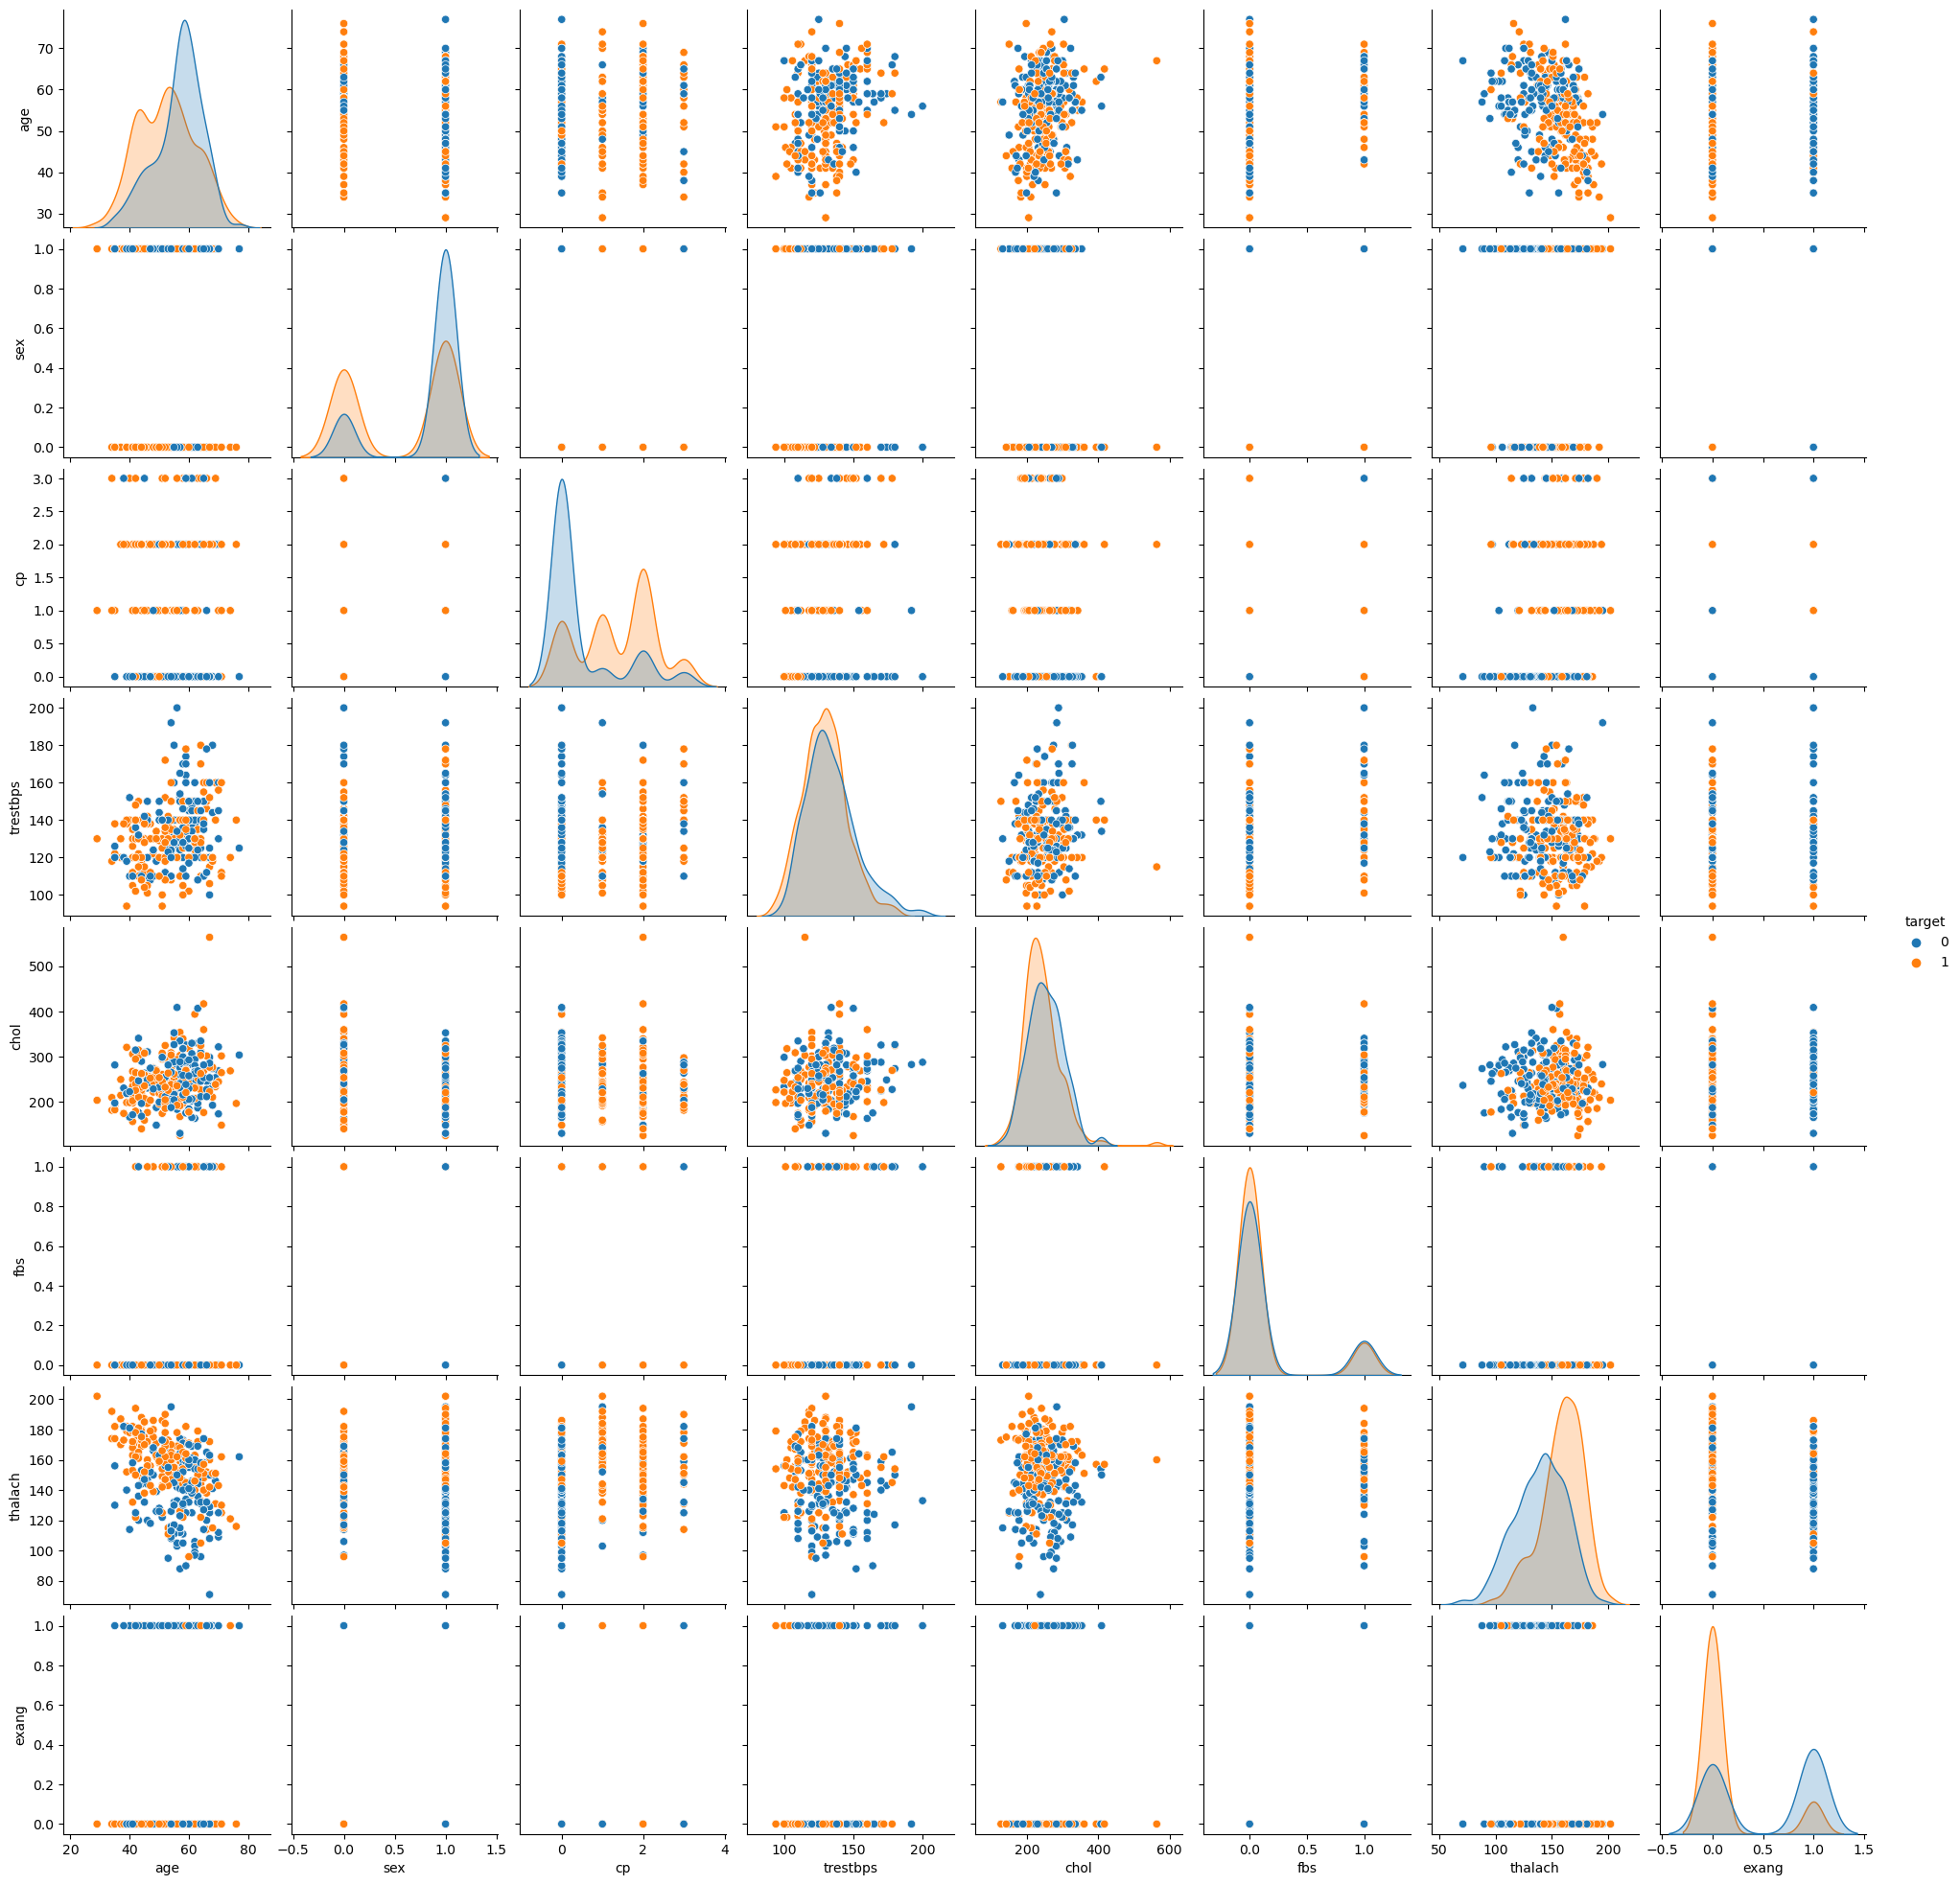

In [14]:
sns.pairplot(data=df, hue = 'target')

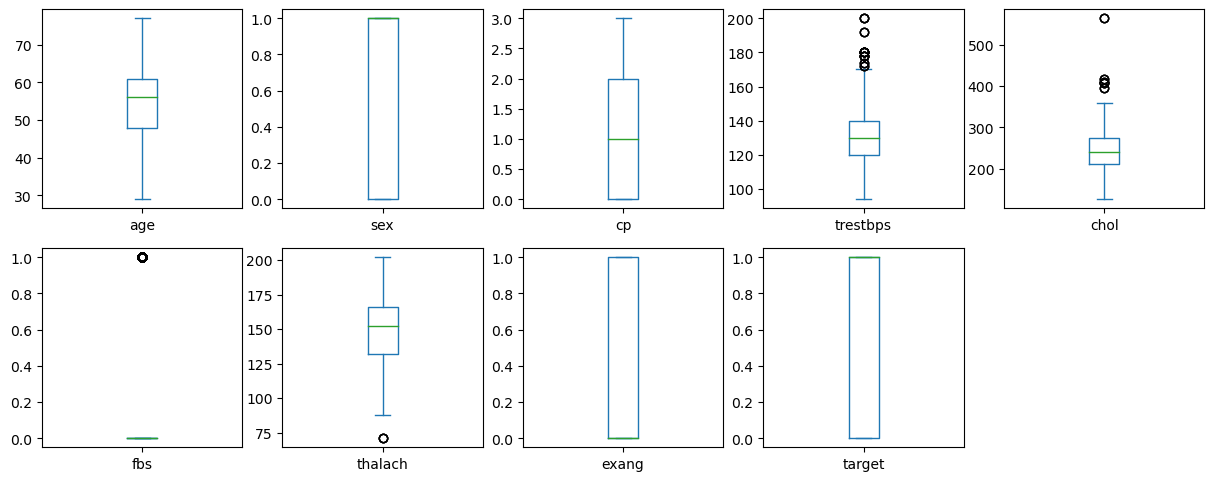

In [15]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,15))
plt.show()

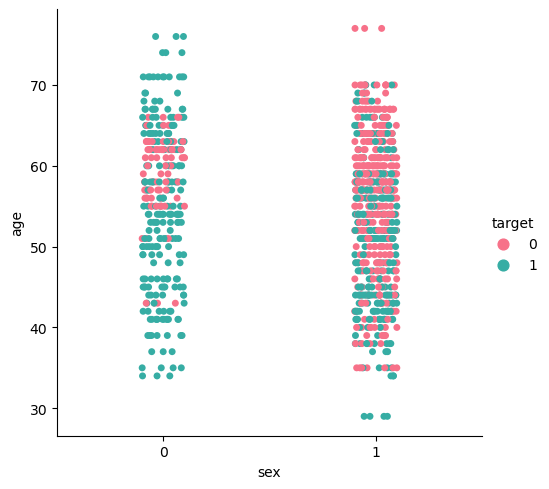

In [16]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')

<AxesSubplot:xlabel='sex', ylabel='chol'>

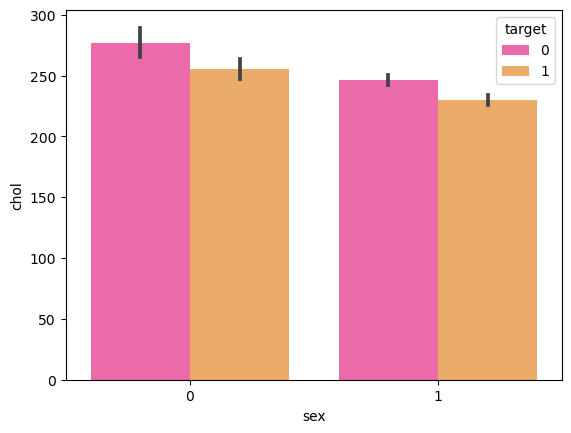

In [17]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [18]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [19]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

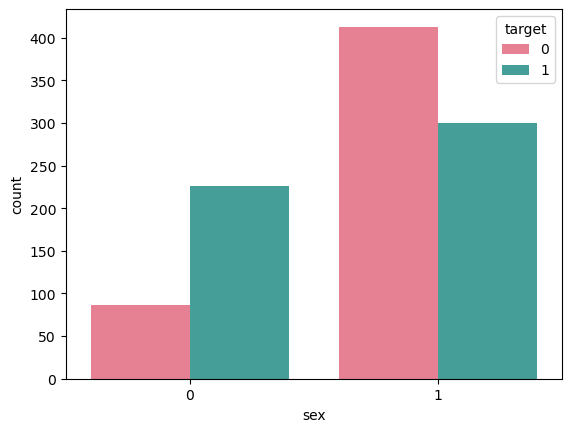

In [21]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

<AxesSubplot:xlabel='target', ylabel='count'>

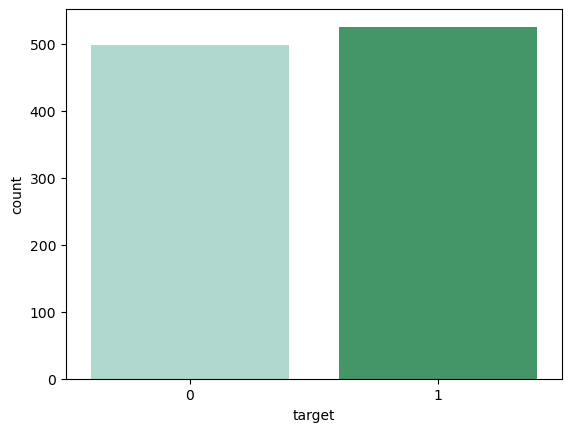

In [22]:
sns.countplot(x='target',palette='BuGn', data=df)

In [24]:
df['cp'].value_counts()  # chest pain type

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

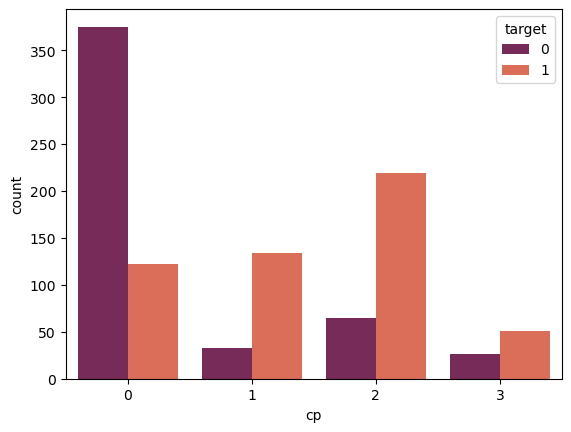

In [25]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

<AxesSubplot:xlabel='cp', ylabel='count'>

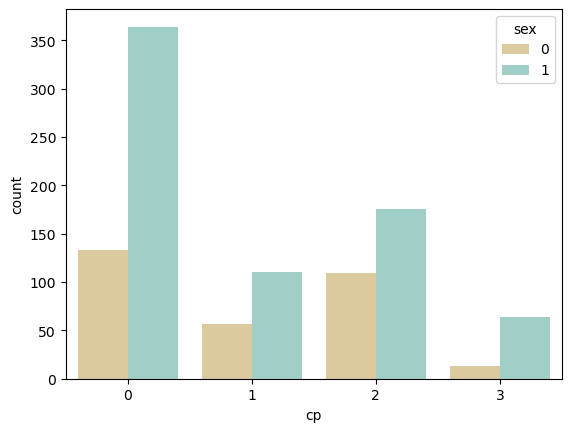

In [26]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

<AxesSubplot:xlabel='sex', ylabel='chol'>

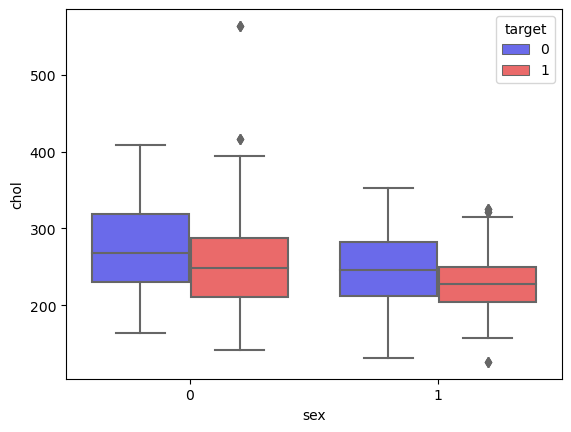

In [27]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

<AxesSubplot:xlabel='sex', ylabel='cp'>

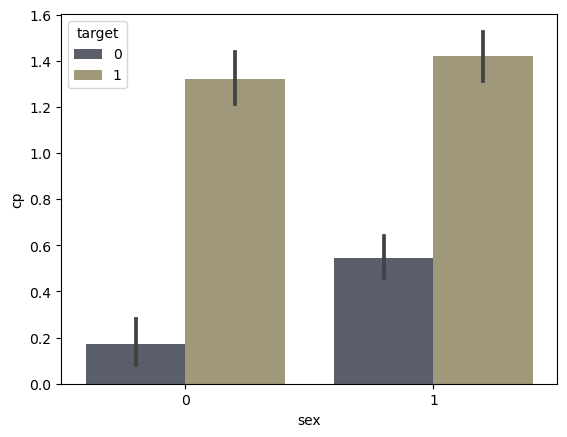

In [28]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

In [32]:
df['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='chol'>

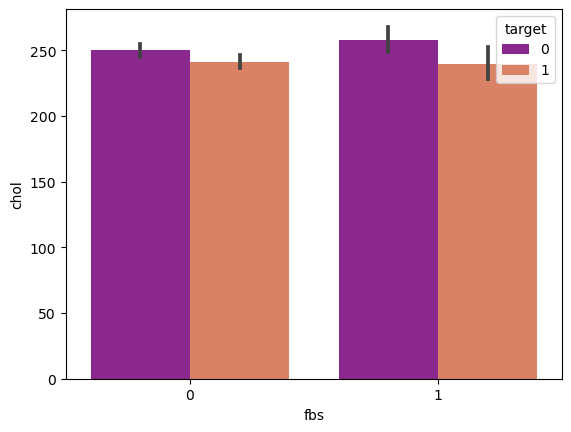

In [33]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

<AxesSubplot:xlabel='sex', ylabel='target'>

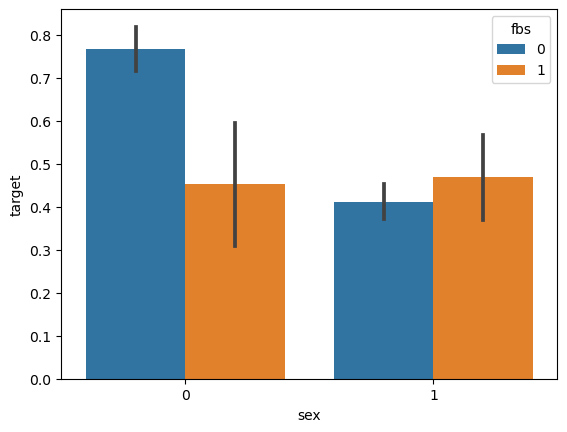

In [34]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

In [35]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0    1
sex             
0        86  226
1       413  300


<AxesSubplot:xlabel='sex'>

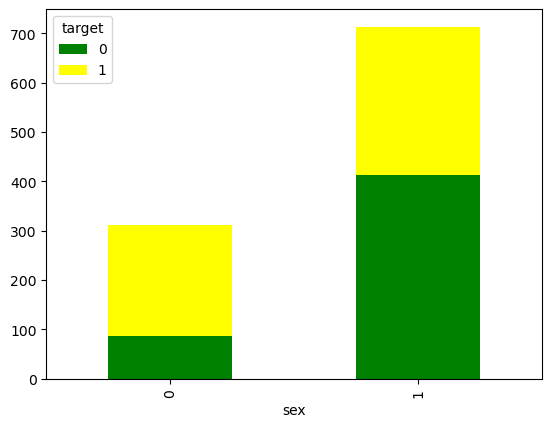

In [36]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [39]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


<AxesSubplot:xlabel='cp'>

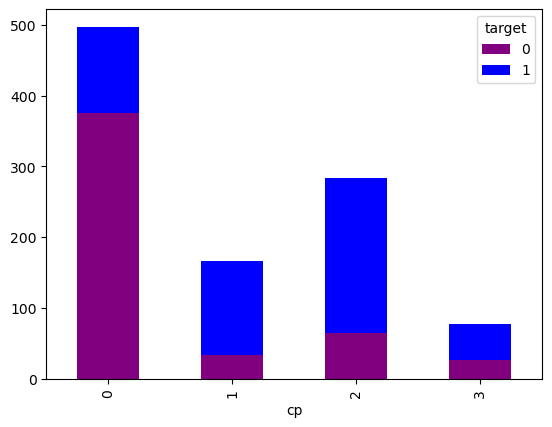

In [40]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,target
0,-0.268437,1,0,-0.377636,-0.659332,0,0.821321,0,0
1,-0.158157,1,0,0.479107,-0.833861,1,0.255968,1,0
2,1.716595,1,0,0.764688,-1.396233,0,-1.048692,1,0
3,0.724079,1,0,0.936037,-0.833861,0,0.516900,0,0
4,0.834359,0,0,0.364875,0.930822,1,-1.874977,0,0


In [44]:
X= df.drop(['target'], axis=1)
y= df['target']

In [45]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [46]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 5736
X_test- 2464
y_train- 717
y_test- 308


In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[111,  42],
       [ 21, 134]], dtype=int64)

<AxesSubplot:>

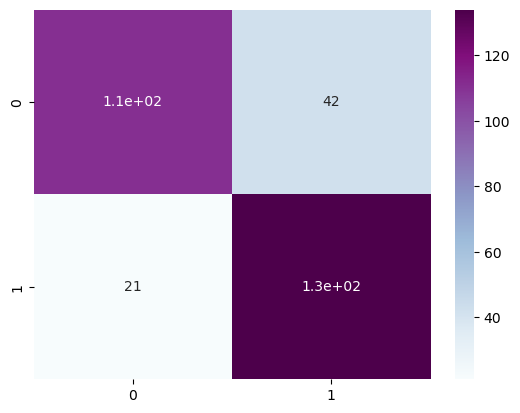

In [49]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [50]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.7954545454545454


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.7954545454545454

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       153
           1       0.76      0.86      0.81       155

    accuracy                           0.80       308
   macro avg       0.80      0.80      0.79       308
weighted avg       0.80      0.80      0.79       308



In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [54]:
cm2

array([[153,   0],
       [  0, 155]], dtype=int64)

In [55]:
accuracy_score(y_test,prediction2)

1.0

In [56]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       155

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[153,   0],
       [  0, 155]], dtype=int64)

In [58]:
accuracy_score(y_test, prediction3)

1.0

In [59]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       155

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [62]:
cm4

array([[119,  34],
       [ 24, 131]], dtype=int64)

In [63]:
accuracy_score(y_test, prediction4)

0.8116883116883117

In [64]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)

In [65]:
cm5

array([[ 99,  54],
       [ 22, 133]], dtype=int64)

In [66]:
accuracy_score(y_test, prediction5)

0.7532467532467533

In [67]:
print('cm4', cm4)
print('-----------')
print('cm5',cm5)

cm4 [[119  34]
 [ 24 131]]
-----------
cm5 [[ 99  54]
 [ 22 133]]


In [68]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

C:\Users\hariadi\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[ 99,  54],
       [ 22, 133]], dtype=int64)

In [69]:
print('KNN :', accuracy_score(y_test, prediction6))
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))

KNN : 0.7987012987012987
lr : 0.7954545454545454
dtc : 1.0
rfc : 1.0
NB:  0.8116883116883117
SVC : 0.7532467532467533
